# Recommendation System Analysis

In this notebook, we explore two types of recommendation systems:

1. Collaborative Filtering
2. Content-Based Recommendation

### Dataset Link : 

https://drive.google.com/file/d/1-MFtFRPGTrkZVdJZD-jdcgYAyUAro_It/view?usp=sharing

# Collaborative Filtering

## Type - 1 [Item Based Collaborative Filtering]

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('user_gold.csv')

In [3]:
data.head(10)

,Gold_Type_ID,Gold_Type,User_ID,Rating
0,1,Gold_Bar,1,5.0
1,1,Gold_Bar,2,4.0
2,1,Gold_Bar,3,3.0
3,1,Gold_Bar,4,5.0
4,1,Gold_Bar,5,2.0
5,1,Gold_Bar,6,4.0
6,1,Gold_Bar,7,3.0
7,1,Gold_Bar,8,5.0
8,1,Gold_Bar,9,2.0
9,1,Gold_Bar,10,5.0


*  As it can be seen data frame that is above, we have 4 features that are Gold_Type_ID, Gold_Type, User_ID and Rating.
<br>
* According to these data frame, we will make item based recommendation system.

In [4]:
data.isnull().sum()

Gold_Type_ID    0
Gold_Type       0
User_ID         0
Rating          0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049 entries, 0 to 1048
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Gold_Type_ID  1049 non-null   int64  
 1   Gold_Type     1049 non-null   object 
 2   User_ID       1049 non-null   int64  
 3   Rating        1049 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 32.9+ KB


In [6]:
data.shape

(1049, 4)

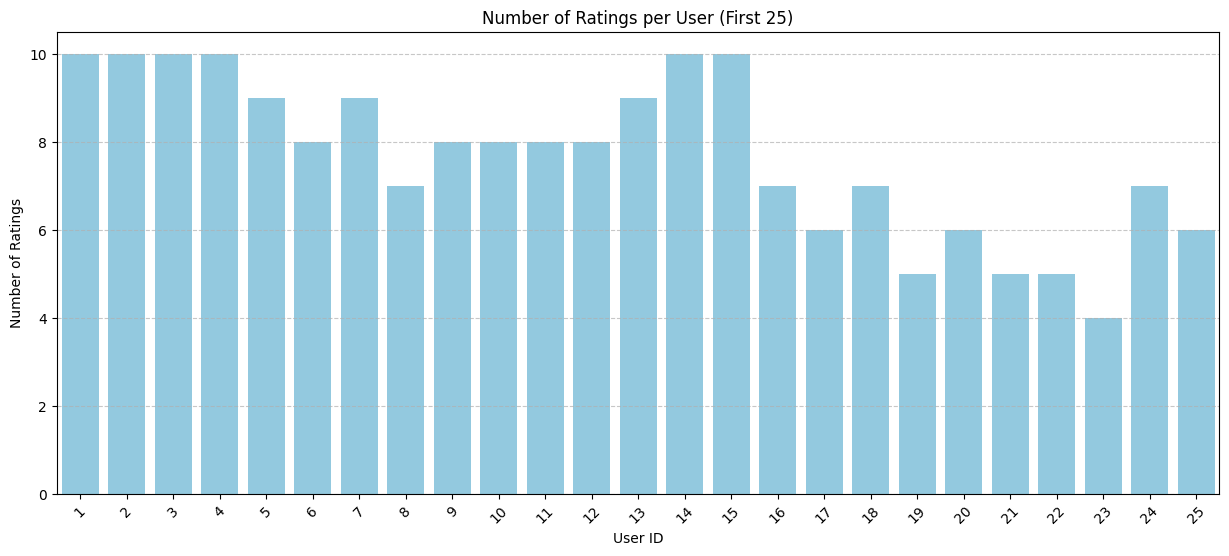

In [7]:
# Grouping the DataFrame by User_ID and counting the number of ratings for each user
ratings_per_user = data.groupby('User_ID')['Rating'].count().reset_index()

ratings_per_user_top_25 = ratings_per_user.head(25)


plt.figure(figsize=(15, 6))
sns.barplot(x='User_ID', y='Rating', data=ratings_per_user_top_25, color='skyblue')
plt.title('Number of Ratings per User (First 25)')
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [8]:
# lets make a pivot table in order to make rows are users and columns are Gold. And values are rating
pivot_table = data.pivot_table(index = ["User_ID"],columns = ["Gold_Type"],values = "Rating")

pivot_table.head(10)

Gold_Type,Bangle,Bracelet,Brooch,Earring,Gold_Bar,Gold_Coin,Gold_Jewelry,Necklace,Pendant,Ring
User_ID,,,,,,,,,,
1,4.0,4.0,5.0,5.0,5.0,4.0,3.0,3.0,3.0,5.0
2,5.0,5.0,3.0,3.0,4.0,3.0,5.0,4.0,4.0,3.0
3,3.0,3.0,4.0,4.0,3.0,4.0,2.0,5.0,5.0,4.0
4,4.0,4.0,5.0,5.0,5.0,2.0,4.0,3.0,3.0,5.0
5,2.0,2.0,4.0,2.0,2.0,5.0,3.0,NaN,4.0,4.0
6,4.0,4.0,3.0,4.0,4.0,3.0,NaN,NaN,2.0,3.0
7,3.0,3.0,5.0,3.0,3.0,4.0,2.0,NaN,5.0,5.0
8,NaN,5.0,2.0,NaN,5.0,2.0,4.0,NaN,3.0,2.0
9,2.0,2.0,4.0,NaN,2.0,5.0,3.0,NaN,4.0,4.0


 * As it can be seen from table above, rows are users, columns are Gold_Type and values are Ratings
 <br>
 * For example user 10 gives 5.0 Rating to Gold_Type "Bracelet" and gives 4.0 rating to movie "Gold_Coin".
 <br>
* Now lets make a scenario, we have Gold_Type "Gold_Bar" are purchased and rated by people. The question is that which Gold_Type do we recommend these people who purchased "Gold_Bar".
<br>
* In order to answer this question we will find similarities between "Gold_Bar" and other Gold_Type.

In [9]:
gold_purchased = pivot_table["Gold_Bar"]

# 👇 find correlation between "Gold_Bar" and other Gold_Type
similarity_with_other_gold = pivot_table.corrwith(gold_purchased)

similarity_with_other_gold = similarity_with_other_gold.sort_values(ascending=False)

similarity_with_other_gold

Gold_Type
Gold_Bar        1.000000
Brooch          0.681909
Earring         0.637489
Bracelet        0.380701
Necklace        0.194034
Bangle          0.192085
Pendant         0.153928
Ring            0.085802
Gold_Coin      -0.120962
Gold_Jewelry   -0.479486
dtype: float64

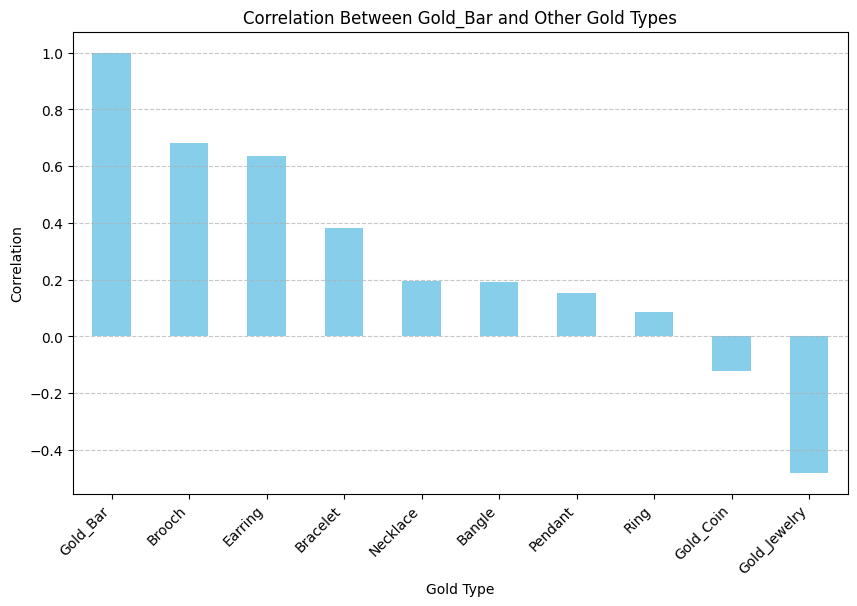

In [10]:
# calculated the correlation between "Gold_Bar" and other Gold_Type
top_correlations = similarity_with_other_gold

plt.figure(figsize=(10, 6))
top_correlations.plot(kind='bar', color='skyblue')
plt.title('Correlation Between Gold_Bar and Other Gold Types')
plt.xlabel('Gold Type')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


* In type 1, The pivot table and correlation method is simpler and focuses on item-item similarity analysis based on user ratings.
* This method directly calculates similarities between items (gold types) based on user ratings. It doesn't involve a machine learning model and is more focused on analyzing the relationships between items in the dataset.

## Type - 2 [User Based Collaborative Filtering]

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("user_gold.csv")
print(df.head())

   Gold_Type_ID Gold_Type  User_ID  Rating
0             1  Gold_Bar        1     5.0
1             1  Gold_Bar        2     4.0
2             1  Gold_Bar        3     3.0
3             1  Gold_Bar        4     5.0
4             1  Gold_Bar        5     2.0


* In this type, The Surprise library approach with SVD involves training a machine learning model to learn user preferences and make personalized recommendations based on collaborative filtering techniques.

In [13]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from collections import defaultdict

reader = Reader(line_format='user item rating', sep=',')
data = Dataset.load_from_df(df[['User_ID', 'Gold_Type', 'Rating']], reader)

trainset, _ = train_test_split(data, test_size=0.2)

# Using the SVD algorithm (Matrix Factorization) for collaborative filtering
model = SVD()

model.fit(trainset)

# Function to get top N recommended items for a user
def get_top_n_recommendations(model, user_id, n=5):
    top_n = defaultdict(list)
    for gold_type in df['Gold_Type'].unique():
        prediction = model.predict(user_id, gold_type)
        top_n[user_id].append((gold_type, prediction.est))
    for user_id, ratings in top_n.items():
        ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[user_id] = ratings[:n]
    return top_n[user_id]


* Provides personalized recommendations based on user-item interactions.
* Incorporates user preferences and behavior learned from the dataset.

Top 3 recommended items for User_ID 3 : [('Necklace', 4.323139267545479), ('Pendant', 4.191965558139748), ('Brooch', 4.145367380990111)]


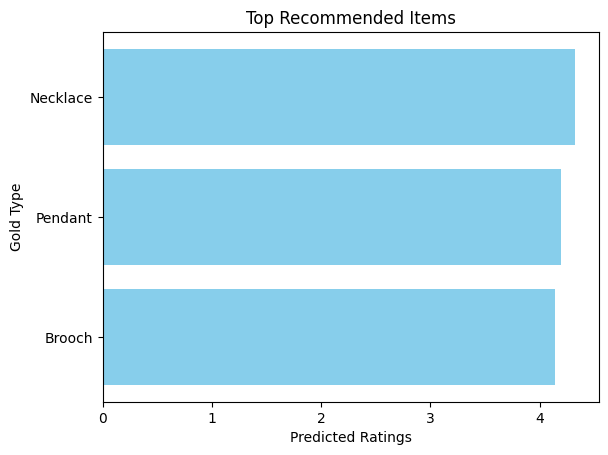

In [14]:
def visualize_recommendations(recommended_items):
    items, ratings = zip(*recommended_items)
    plt.barh(items, ratings, color='skyblue')
    plt.xlabel('Predicted Ratings')
    plt.ylabel('Gold Type')
    plt.title('Top Recommended Items')
    plt.gca().invert_yaxis()
    plt.show()

# Getting top 3 recommendations for User_ID 3
user_id = 3
recommended_items = get_top_n_recommendations(model, user_id, n=3)
print("Top 3 recommended items for User_ID", user_id, ":", recommended_items)

visualize_recommendations(recommended_items)


# Content Based Filtering

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from collections import defaultdict

# Load the dataset

df = pd.read_csv('user_gold.csv')

In [16]:
df.head()

,Gold_Type_ID,Gold_Type,User_ID,Rating
0,1,Gold_Bar,1,5.0
1,1,Gold_Bar,2,4.0
2,1,Gold_Bar,3,3.0
3,1,Gold_Bar,4,5.0
4,1,Gold_Bar,5,2.0


In [17]:
gold_type_stats = df.groupby('Gold_Type')['Rating'].agg(['mean', 'count', 'std']).reset_index()

In [18]:
# Feature Extraction 
import numpy as np
gold_type_stats = df.groupby('Gold_Type')['Rating'].agg(['mean', 'count', 'std']).reset_index()

#Content-Based Filtering similarity matrix

def compute_similarity_average_rating(stats1, stats2):

  similarity = 1 - abs(stats1['mean'] - stats2['mean'])
  return similarity

similarity_matrix = np.zeros((len(gold_type_stats), len(gold_type_stats)))
for i in range(len(gold_type_stats)):
  for j in range(i + 1, len(gold_type_stats)):
    similarity = compute_similarity_average_rating(gold_type_stats.iloc[i], gold_type_stats.iloc[j])
    similarity_matrix[i, j] = similarity
    similarity_matrix[j, i] = similarity  # Fill similarity matrix for both directions




* The above code block computes aggregate statistics for each gold type (such as mean rating) and then uses these statistics to compute a similarity matrix based on the average ratings of different gold types. This similarity matrix can be further used for content-based filtering recommendation systems or other analysis tasks.

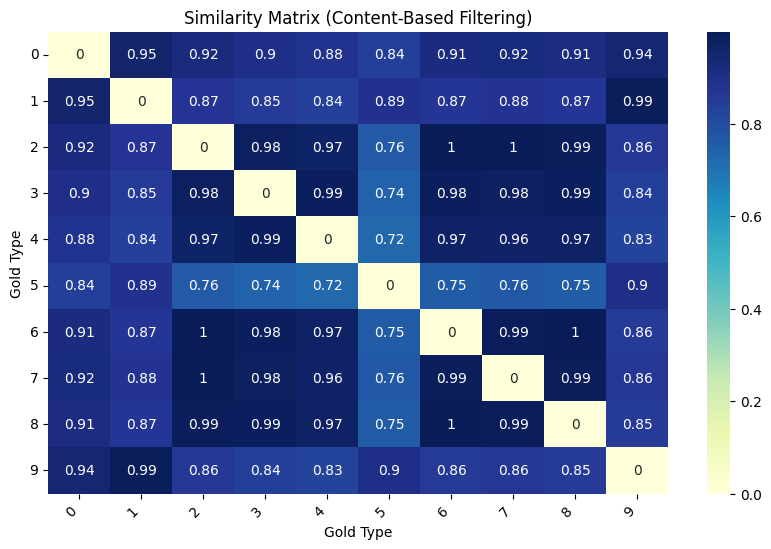

In [19]:
# plotting  heatmap for similarity matrix
import seaborn as sns
import matplotlib.pyplot as plt




plt.figure(figsize=(10, 6))  
sns.heatmap(similarity_matrix, annot=True, cmap="YlGnBu")  


plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0)  
plt.xlabel('Gold Type')
plt.ylabel('Gold Type')
plt.title('Similarity Matrix (Content-Based Filtering)')


plt.show()


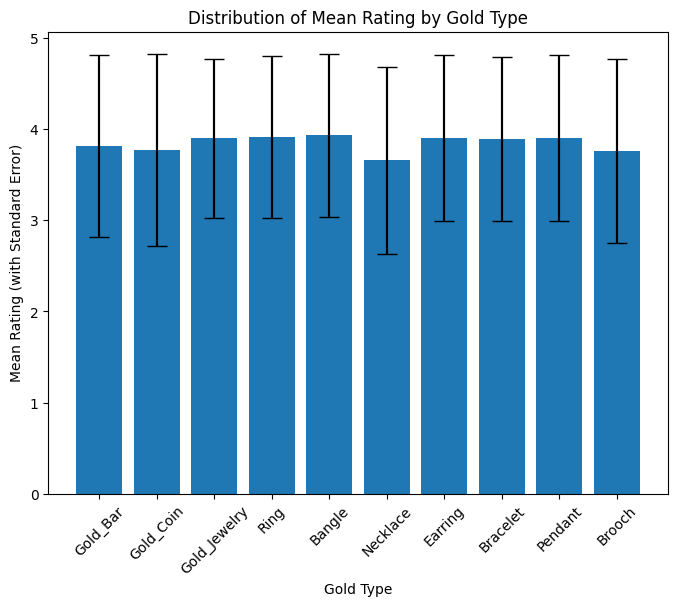

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(df['Gold_Type'].unique(), df.groupby('Gold_Type')['Rating'].mean(), yerr=df.groupby('Gold_Type')['Rating'].std())
plt.xlabel("Gold Type")
plt.ylabel("Mean Rating (with Standard Error)")
plt.title("Distribution of Mean Rating by Gold Type")
plt.xticks(rotation=45)
plt.errorbar(df['Gold_Type'].unique(), df.groupby('Gold_Type')['Rating'].mean(), yerr=df.groupby('Gold_Type')['Rating'].std(), fmt='none', ecolor='black', capsize=7)  # Customize error bars
plt.show()


In [21]:
def generate_recommendations(gold_type_stats, similar_gold_types, top_n=3):


  
  recommendation_scores = defaultdict(float)

  
  for idx, row in gold_type_stats.iterrows():
    if idx != gold_type_index:  # Skip the target gold type itself
      gold_type = row['Gold_Type']
      similarity_score = similar_gold_types[idx - len(similar_gold_types)]  

     
      recommendation_scores[gold_type] += similarity_score * row['mean']  

  
  sorted_recommendations = sorted(recommendation_scores.items(), key=lambda x: x[1], reverse=True)

  
  top_recommendations = sorted_recommendations[:top_n]
  return top_recommendations


* The above function takes in statistics about gold types (such as mean rating) and their similarities to a target gold type, then generates recommendations by combining similarity scores and mean ratings of other gold types.

In [22]:

gold_type = 'Gold_Bar'


gold_type_index = gold_type_stats[gold_type_stats['Gold_Type'] == gold_type].index[0]


similar_gold_types = similarity_matrix[gold_type_index]


top_recommendations = generate_recommendations(gold_type_stats.copy(), similar_gold_types, top_n=5)


print(f"Top {len(top_recommendations)} Recommendations for {gold_type}:")
for gold_type, score in top_recommendations:
 print(f"- {gold_type} (Recommendation Score: {score:.2f})")

Top 5 Recommendations for Gold_Bar:
- Earring (Recommendation Score: 3.86)
- Pendant (Recommendation Score: 3.79)
- Gold_Jewelry (Recommendation Score: 3.79)
- Brooch (Recommendation Score: 3.77)
- Necklace (Recommendation Score: 3.74)


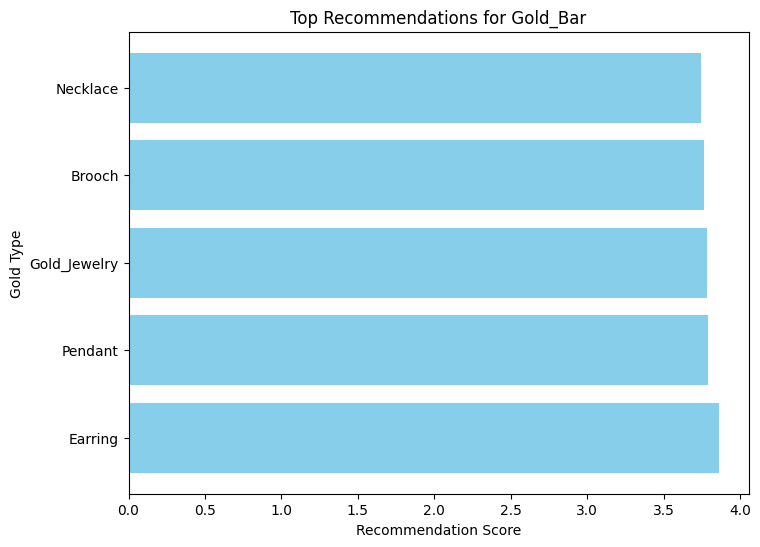

In [23]:
#visualization

top_gold_types = [gold_type for gold_type, _ in top_recommendations[:5]] 
top_gold_types.reverse()

recommendation_scores = [score for _, score in top_recommendations[:5]]  
recommendation_scores.reverse()
plt.figure(figsize=(8, 6))
plt.barh(top_gold_types, recommendation_scores, color='skyblue')  
plt.xlabel('Recommendation Score')
plt.ylabel('Gold Type')
plt.title('Top Recommendations for Gold_Bar')  
plt.gca().invert_yaxis() 
plt.show()
